### Principal Component Analysis

A matemática de Principal Component Analysis (PCA) é um tanto complexa para ser explicada de maneira simples, pois requer conhecimento de Algebra Linear e Cadeias de Markov.
<br><br>

Aqui vamos tentar explicar na forma geométrica. Lembre-se na regressão linear, depois de predizer a reta com menor erro quadrático, obtinhamos os resíduos. Caso os resíduos se aproximassem-se de uma distribuição normal, a soma dos erros tenderia a zero.

Em PCA fazemos, de certa maneira a mesma coisa, fazemos a mesma coisa. A reta verde grande, abaixo, é um regessão na direção de maior variãncia. Após encontrá-la, há resíduos, e podemos fazer uma regessão na direção ortogonal, a reta em verde de menor tamanho.

Caso tenhamos n dimensões, fazemos regressões, ou melhor acamos vetores no espaço na maior dispersão, e assim por diante até a menor dispersão, caso haja. Este vetores são todos ortonormais (perpendicurlares) e na Algebra Linear acompanha um auto-valor. Ou seja, para n dimensões temos n autovetores e n autovalores.


![PCA](../figure/pca.png)

Cada vetor pode ser escrito como:
    
$y_i = a_{i1} * x_1  +  a_{i2} * x_2 + .. a_{in} * x_n$
<br><br>
como se observa, o autovetor y_i é linear, e é uma combinação linear de todos os eixo x1, x2 .. até xn

caso os 3 primeiros autovetores, p.ex., perfizerem a soma de 92% de toda a dispersão dos valores neste espaço amostral de n dimensões, podemos aproximar um regressor com 3 autovetores, dispensando n-3 autovetores. A isto denominamos "redução de dimensionalidade".

Espera-se que um PCA atinja mais de 90% de dispersão total com 2 ou 3 variávies, neste caso podemos ver os grupos no espaço 2D ou 3D.

Vamos ver na prática como isto funciona, não se esquecendo que o PCA é totalmente linear e capaz de fazer redução de dimensionalidade, ou seja, clusterizar grupos com muito menos de n autovetores, também chamados de Principais Componentes.

In [1]:
import os, sys
import pandas as pd # pandas e seu alias pd
import numpy as np  # numpy  e seu alias np

from   scipy import stats

from scipy.cluster.hierarchy import dendrogram, linkage
# from sklearn.cluster import AgglomerativeClustering

sys.path.insert(1, '../libs/')
from stat_lib import *

import seaborn as sns

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### Abrindo a tabela de Iris de Fisher & Anderson
  - comprimento (largura) das pétalas (sépalas)
    - calcula-se a distância:
      - presume-se que o quanto mais perto (próximo de zero) será da mesma espécie
      - desenha-se o dendrograma
        - calcula-se erros
        - colore-se as espécies

    - Repare que d_ij == d_ji

In [2]:
fname = "../data/Iris.csv"
if os.path.exists(fname):
    df = pd.read_csv(fname)
else:
    print("Impossível abrir '%s'"%(fname))
    raise('Error')
    
print(df.shape)
df.columns = ['id', 'sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'species']

df.head(3)

(150, 6)


,id,sepal_len,sepal_width,petal_len,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
df.iloc[51:53]

,id,sepal_len,sepal_width,petal_len,petal_width,species
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor


![dendrograma](../figure/dendrogram.png)
      
      - Em genética, se o comprimento dos ramos for proporcional ao tempo (tempo de especiação):
        - Este tipo de árvore chamase Árvore Filogenética
        - O nó se chama ancestral
        - O nó mais acima, o que junta todas os nós e folhas, chama-se último ancestral comumn
        - Se um ramo aparece até os dias presentes: "tal espécie ainda existe"
        - Se um ramo pára num passado qualquer: "tal espécie está extinta"
        
      - Na árvore da vida o ancestral comum chama-se **LUCA** !
   
**last universal common ancestor or last universal cellular ancestor (LUCA)**

        
https://en.wikipedia.org/wiki/Last_universal_common_ancestor


### Árovre da Vida de Carl Wöese

Carl Wöese

https://en.wikipedia.org/wiki/Carl_Woese

  - Árvore da vida
    - LUCA
      - Archaea
      - Bacteria
      - Eukariota

![arvore da vida](../figure/Phylogenetic_tree.png)
      

In [4]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
species = list(df.species)

labels = ["%d - %s"%(i, species[i]) for i in range(len(species))]
labels = ['S']*50 + ['E']*50 + ['I']*50

In [6]:
df.columns

Index(['id', 'sepal_len', 'sepal_width', 'petal_len', 'petal_width',
       'species'],
      dtype='object')

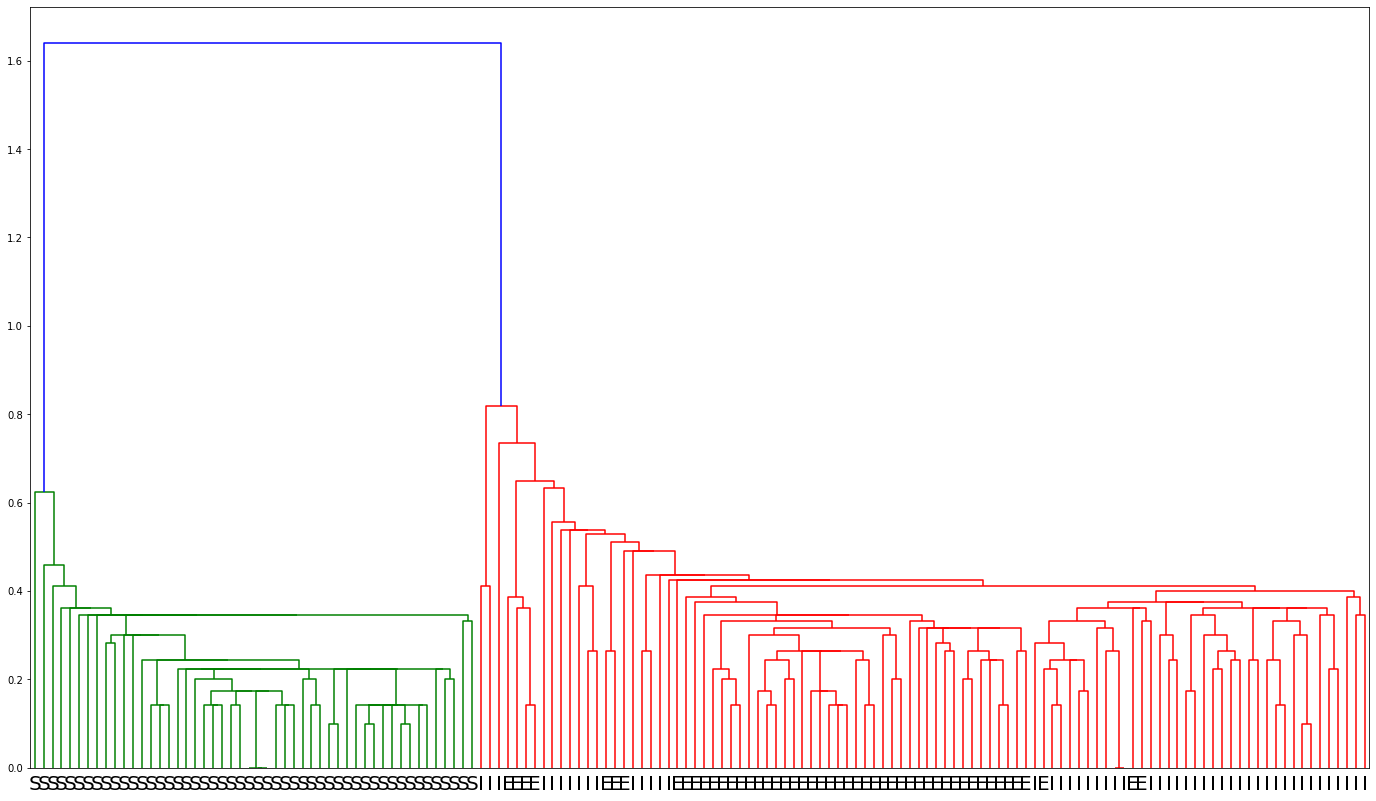

In [7]:
data  = df[ ['sepal_len', 'sepal_width', 'petal_len', 'petal_width']]

plt.figure(figsize=(24,14))
colors = ['red', 'blue', 'green']

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
Z = linkage(data, method='single', metric='euclidean')

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
dicr = dendrogram(Z, labels=labels, leaf_font_size=20, leaf_rotation=0,
                  orientation='top', distance_sort='descending', show_leaf_counts=True);

In [8]:
#-- dicr[0] contém as informações calculadas
dicr.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

In [9]:
# predição de espécies ~ nomes (labels) das folhas
dicr['ivl'][:10]

['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']

### Cálculo de acuracidade

In [10]:
ok = [True if labels[i] == dicr['ivl'][i] else False for i in range(len(labels))]
ok[:10], np.mean(ok)

([True, True, True, True, True, True, True, True, True, True], 0.8)

In [11]:
"".join(dicr['ivl'])

'SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSIIIEEEEIIIIIIIEEEIIIIIEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEIEIIIIIIIIIEEIIIIIIIIIIIIIIIIIIIIIIIII'

In [12]:
"".join(labels)

'SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'

### Posso girar um eixo do dendrograma sem perder nem ganhar informação

In [13]:
labels2 = ['S']*50 + ['I']*50 + ['E']*50

In [14]:
ok = [True if labels2[i] == dicr['ivl'][i] else False for i in range(len(labels2))]
ok[:10], np.mean(ok)

([True, True, True, True, True, True, True, True, True, True],
 0.5333333333333333)